### 이상치 데이터 처리
- 피쳐/특성 데이터 값의 범위를 벗어나는 데이터를 의미
- 종류 : 잘못 입력된 경우, 혹은 자연으로 생성된 데이터
    - 잘못 입력된 데이터 : 입력 시의 오타 ===> 제거 또는 대체
    - 자연 생성 데이터 : 연봉, 키, 몸무게, 나이 ===> 분리해서 전용 모델/ 식별용 피쳐
- 탐지
    - 시각화 확인
    - 데이터의 분포를 확인 : Z-score /IQR(Turkey Fences)
- 처리

### (1) 모듈 로딩 및 데이터 준비 <hr>

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# 임의의 데이터
dataDF = pd.DataFrame({"num":[1,2,-3,1,2,3,1,2,3,1,15]})
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     11 non-null     int64
dtypes: int64(1)
memory usage: 216.0 bytes


### (2) 데이터 전처리 <hr>

#### (2-1) 데이터 확인

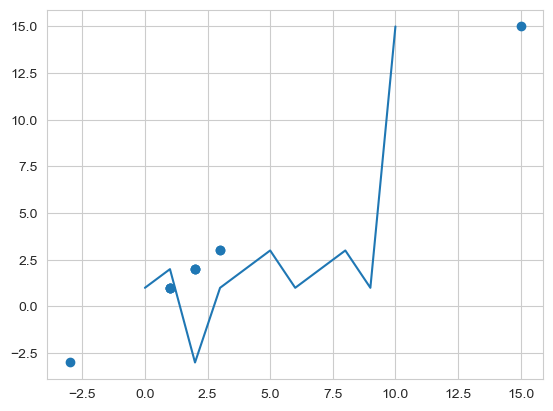

In [28]:
# 시각화로 데이터 분포 확인
plt.plot(dataDF)
plt.scatter(dataDF["num"],dataDF["num"])

Text(0.5, 1.0, '[Data Distribution]')

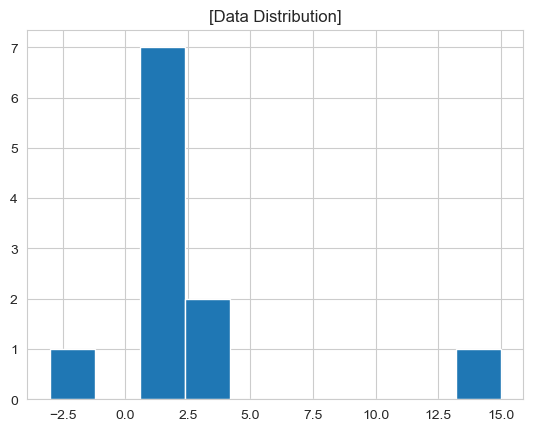

In [29]:
plt.hist(dataDF)
plt.title("[Data Distribution]")

#### (2-2) 불필요 데이터 체크 => 결측치, 이상치

In [30]:
# 결측치
dataDF.isnull().sum()

num    0
dtype: int64

In [31]:
# 이상치 탐지 - 방법(1) 평균과 편차를 이용한 탐지 Z-Score
# Z-Score = 데이터 - 평균/표준편차
mean_value = dataDF.mean()
std_value = dataDF.std()

z_data = (dataDF - mean_value) / std_value

In [32]:
# 양끝단 제거를 위한 기준값 => 1.0
base = 1.0
mask = z_data.abs()>base

In [33]:
dataDF[~mask].dropna(inplace=True)

In [34]:
# 이상치 탐지 - 방법(2) 데이터를 4등분해서 가운데 데이터를 기준으로 이상치 탐지
q1= dataDF.quantile(0.25)
q3= dataDF.quantile(0.75)
iqr = q1-q3
lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)

print(f'IQR :{iqr}\nq1 :{q1}\nq3 :{q3}')
print(f'lower :{lower}\nupper :{upper}')

IQR :num   -1.5
dtype: float64
q1 :num    1.0
Name: 0.25, dtype: float64
q3 :num    2.5
Name: 0.75, dtype: float64
lower :num    3.25
dtype: float64
upper :num    0.25
dtype: float64


In [35]:
dataDF[dataDF<lower]

,num
0,1.0
1,2.0
2,-3.0
3,1.0
4,2.0
5,3.0
6,1.0
7,2.0
8,3.0
9,1.0


In [36]:
dataDF[dataDF>upper]

,num
0,1.0
1,2.0
2,NaN
3,1.0
4,2.0
5,3.0
6,1.0
7,2.0
8,3.0
9,1.0


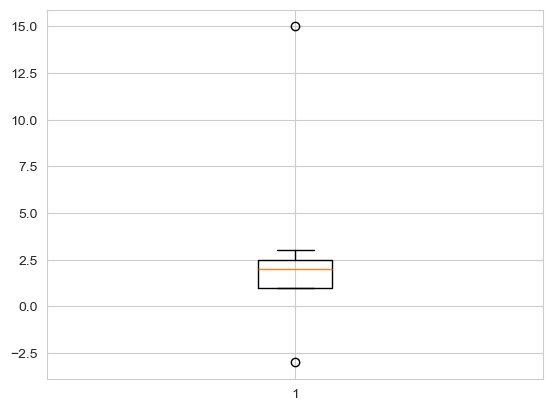

In [37]:
bp_obj = plt.boxplot(dataDF)

In [38]:
bp_obj.keys()

dict_keys(['whiskers', 'caps', 'boxes', 'medians', 'fliers', 'means'])

In [39]:
bp_obj['whiskers'][0].get_ydata(), bp_obj['whiskers'][1].get_ydata()

(array([1., 1.]), array([2.5, 3. ]))

In [40]:
bp_obj['whiskers'][0].get_ydata()[1], bp_obj['whiskers'][1].get_ydata()[1]


(1.0, 3.0)

In [41]:
print(f"""'최저 :', {bp_obj['whiskers'][0].get_ydata()[1]}, 
'1QR :' {bp_obj['whiskers'][0].get_ydata()[0]}, 
'3QR :' {bp_obj['whiskers'][1].get_ydata()[0]}
'최고 :' {bp_obj['whiskers'][1].get_ydata()[1]})""")


'최저 :', 1.0, 
'1QR :' 1.0, 
'3QR :' 2.5
'최고 :' 3.0)
